<a href="https://colab.research.google.com/github/sahishnutsa/Machine-Learning/blob/main/Feature_Extraction_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading MNIST dataset...
Preprocessing completed.
Extracting HOG features...
Extracting LBP features...


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Extracting Edge features...
Training classifiers...

Performance for HOG:
Accuracy: 0.9193
Precision: 0.9192
Recall: 0.9191
F1-Score: 0.9188

Performance for LBP:
Accuracy: 0.4253
Precision: 0.3895
Recall: 0.4146
F1-Score: 0.3865

Performance for Edge Detection:
Accuracy: 0.8179
Precision: 0.8238
Recall: 0.8134
F1-Score: 0.8119


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


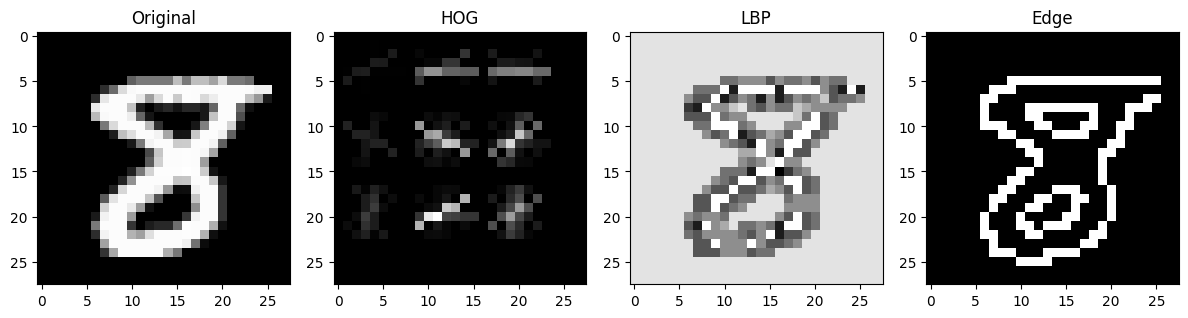

Experiment completed.


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from skimage.feature import hog, local_binary_pattern, canny
import matplotlib.pyplot as plt

# 1. Load and Preprocess MNIST Dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.reshape(-1, 28, 28)  # Reshape to 28x28 images
y = y.astype(int)  # Ensure labels are integers

# Split into training and test sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing function
def preprocess_image(image):
    # MNIST is already grayscale, normalize to [0, 1]
    normalized_image = image / 255.0
    return normalized_image

# Apply preprocessing
X_train_preprocessed = np.array([preprocess_image(img) for img in X_train])
X_test_preprocessed = np.array([preprocess_image(img) for img in X_test])
print("Preprocessing completed.")

# 2. Feature Extraction Functions
# HOG Features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

# LBP Features
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
        lbp_features.append(hist)
    return np.array(lbp_features)

# Edge Detection Features (Canny)
def extract_edge_features(images):
    edge_features = []
    for img in images:
        edges = canny(img, sigma=1.0, low_threshold=0.1, high_threshold=0.2)
        edge_features.append(edges.ravel())  # Flatten to 1D vector
    return np.array(edge_features)

# Extract features for all methods
print("Extracting HOG features...")
X_train_hog = extract_hog_features(X_train_preprocessed)
X_test_hog = extract_hog_features(X_test_preprocessed)

print("Extracting LBP features...")
X_train_lbp = extract_lbp_features(X_train_preprocessed)
X_test_lbp = extract_lbp_features(X_test_preprocessed)

print("Extracting Edge features...")
X_train_edge = extract_edge_features(X_train_preprocessed)
X_test_edge = extract_edge_features(X_test_preprocessed)

# 3. Train Random Forest Classifier
def train_classifier(X_train_features, y_train):
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    clf.fit(X_train_features, y_train)
    return clf

print("Training classifiers...")
clf_hog = train_classifier(X_train_hog, y_train)
clf_lbp = train_classifier(X_train_lbp, y_train)
clf_edge = train_classifier(X_train_edge, y_train)

# 4. Evaluate Classifier Performance
def evaluate_classifier(clf, X_test_features, y_test, method_name):
    y_pred = clf.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"\nPerformance for {method_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Evaluate each method
results_hog = evaluate_classifier(clf_hog, X_test_hog, y_test, "HOG")
results_lbp = evaluate_classifier(clf_lbp, X_test_lbp, y_test, "LBP")
results_edge = evaluate_classifier(clf_edge, X_test_edge, y_test, "Edge Detection")

# 5. Visualize a sample image and its features
sample_img = X_test_preprocessed[0]
hog_vis = hog(sample_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)[1]
lbp_vis = local_binary_pattern(sample_img, P=8, R=1, method='uniform')
edge_vis = canny(sample_img, sigma=1.0, low_threshold=0.1, high_threshold=0.2)

plt.figure(figsize=(12, 3))
plt.subplot(141); plt.imshow(sample_img, cmap='gray'); plt.title("Original")
plt.subplot(142); plt.imshow(hog_vis, cmap='gray'); plt.title("HOG")
plt.subplot(143); plt.imshow(lbp_vis, cmap='gray'); plt.title("LBP")
plt.subplot(144); plt.imshow(edge_vis, cmap='gray'); plt.title("Edge")
plt.tight_layout()
plt.show()

print("Experiment completed.")

Loading MNIST dataset...
Preprocessing images for MobileNetV2...
Preprocessing completed.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracting MobileNetV2 features...
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 204ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step
MobileNetV2 features shape: (10000, 11520)
Training Random Forest classifier...

Performance for MobileNetV2:
Accuracy: 0.9470
Precision: 0.9483
Recall: 0.9478
F1-Score: 0.9474


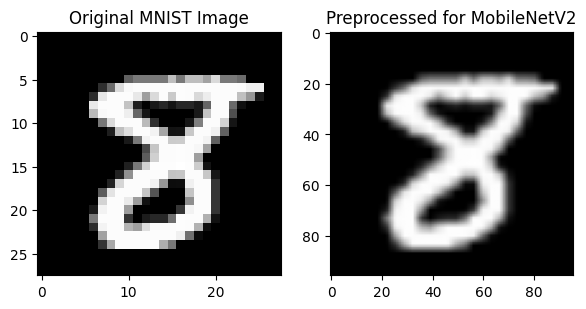

Experiment completed.


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from skimage.transform import resize
import matplotlib.pyplot as plt

# 1. Load and Preprocess MNIST Dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.reshape(-1, 28, 28)  # Reshape to 28x28 images
y = y.astype(int)  # Ensure labels are integers

# Split into training and test sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing function for MobileNetV2
def preprocess_image(image):
    # Normalize to [0, 1] first
    img_normalized = image / 255.0
    # Convert grayscale to 3-channel (RGB) by repeating the single channel
    img_3channel = np.stack([img_normalized] * 3, axis=-1)  # Shape: (28, 28, 3)
    # Resize to 96x96 (minimum size MobileNetV2 accepts)
    img_resized = resize(img_3channel, (96, 96), anti_aliasing=True)
    # Apply MobileNetV2 preprocessing (scales to [-1, 1])
    img_processed = preprocess_input(img_resized * 255.0)  # Multiply by 255 to match expected range
    return img_processed

# Apply preprocessing
print("Preprocessing images for MobileNetV2...")
X_train_preprocessed = np.array([preprocess_image(img) for img in X_train[:10000]])  # Subset for speed
X_test_preprocessed = np.array([preprocess_image(img) for img in X_test[:2000]])     # Subset for speed
y_train_subset = y_train[:10000]
y_test_subset = y_test[:2000]
print("Preprocessing completed.")

# 2. Feature Extraction with Pre-trained MobileNetV2
# Load MobileNetV2 without top classification layer
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Extract features function
def extract_mobilenet_features(images):
    features = mobilenet_model.predict(images, batch_size=32, verbose=1)
    # Flatten the output (e.g., from (batch_size, 3, 3, 1280) to (batch_size, 11520))
    features_flat = features.reshape(features.shape[0], -1)
    return features_flat

print("Extracting MobileNetV2 features...")
X_train_mobilenet = extract_mobilenet_features(X_train_preprocessed)
X_test_mobilenet = extract_mobilenet_features(X_test_preprocessed)
print(f"MobileNetV2 features shape: {X_train_mobilenet.shape}")

# 3. Train Random Forest Classifier
def train_classifier(X_train_features, y_train):
    clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
    clf.fit(X_train_features, y_train)
    return clf

print("Training Random Forest classifier...")
clf_mobilenet = train_classifier(X_train_mobilenet, y_train_subset)

# 4. Evaluate Classifier Performance
def evaluate_classifier(clf, X_test_features, y_test, method_name):
    y_pred = clf.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"\nPerformance for {method_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Evaluate MobileNetV2 features
results_mobilenet = evaluate_classifier(clf_mobilenet, X_test_mobilenet, y_test_subset, "MobileNetV2")

# 5. Visualize a sample image
sample_img = X_test[0]
sample_img_preprocessed = X_test_preprocessed[0]

plt.figure(figsize=(6, 3))
plt.subplot(121); plt.imshow(sample_img, cmap='gray'); plt.title("Original MNIST Image")
plt.subplot(122); plt.imshow(sample_img_preprocessed[:, :, 0], cmap='gray'); plt.title("Preprocessed for MobileNetV2")
plt.tight_layout()
plt.show()

print("Experiment completed.")